<a href="https://colab.research.google.com/github/nikita-0209/ml_quark_gluon/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://towardsdatascience.com/logistic-regression-for-binary-classification-56a2402e62e6

Explanation + Maths: https://towardsdatascience.com/binary-classification-with-logistic-regression-31b5a25693c4

Logistic v/s Linear: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
labels = np.load("/content/drive/MyDrive/lhc/nopid_rTrue_pFalse_tTrue_tw1.0_cf_False_maskTrue_cmaskFalse_nc_100_MD_1000_DF_1000_NH_4_NL_4_NHL_2_temp_0.10_opt_adam_bsize_128_lr_0.00005_SB_1.0_N_1jetclr_labs_1.npy")

In [ ]:
reps = np.load("/content/drive/MyDrive/lhc/nopid_rTrue_pFalse_tTrue_tw1.0_cf_False_maskTrue_cmaskFalse_nc_100_MD_1000_DF_1000_NH_4_NL_4_NHL_2_temp_0.10_opt_adam_bsize_128_lr_0.00005_SB_1.0_N_1jetclr_reps_1.npy")[:, 0]

In [ ]:
labels_train, labels_test, reps_train, reps_test = train_test_split(labels, reps, test_size=0.33, random_state=69)

In [ ]:
# Create an instance of the model. 
logreg = LogisticRegression(max_iter = 500) 
# Training the model. 
logreg.fit(reps_train,labels_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Training predictions (to demonstrate overfitting)
train_predictions = logreg.predict(reps_train)
train_probs = logreg.predict_proba(reps_train)[:, 1]

In [ ]:
# Testing predictions (to determine performance)
y_pred = logreg.predict(reps_test)
y_probs = logreg.predict_proba(reps_test)[:, 1]

In [ ]:
y_pred[0], y_probs[0]

(1.0, 0.8478634368938139)

Recall Baseline: 1.0 Test: 0.74 Train: 0.74
Precision Baseline: 0.5 Test: 0.79 Train: 0.79
Roc Baseline: 0.5 Test: 0.84 Train: 0.85


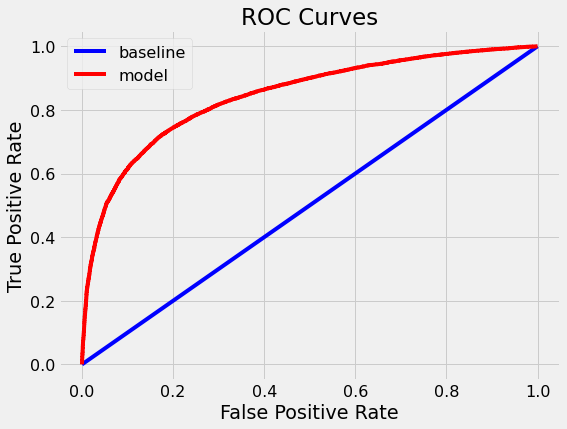

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(labels_test, 
                                     [1 for _ in range(len(labels_test))])
    baseline['precision'] = precision_score(labels_test, 
                                      [1 for _ in range(len(labels_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(labels_test, predictions)
    results['precision'] = precision_score(labels_test, predictions)
    results['roc'] = roc_auc_score(labels_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(labels_train, train_predictions)
    train_results['precision'] = precision_score(labels_train, train_predictions)
    train_results['roc'] = roc_auc_score(labels_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(labels_test, [1 for _ in range(len(labels_test))])
    model_fpr, model_tpr, _ = roc_curve(labels_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(y_pred, y_probs, train_predictions, train_probs)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Normalized confusion matrix
[[0.80224515 0.19775485]
 [0.25756659 0.74243341]]


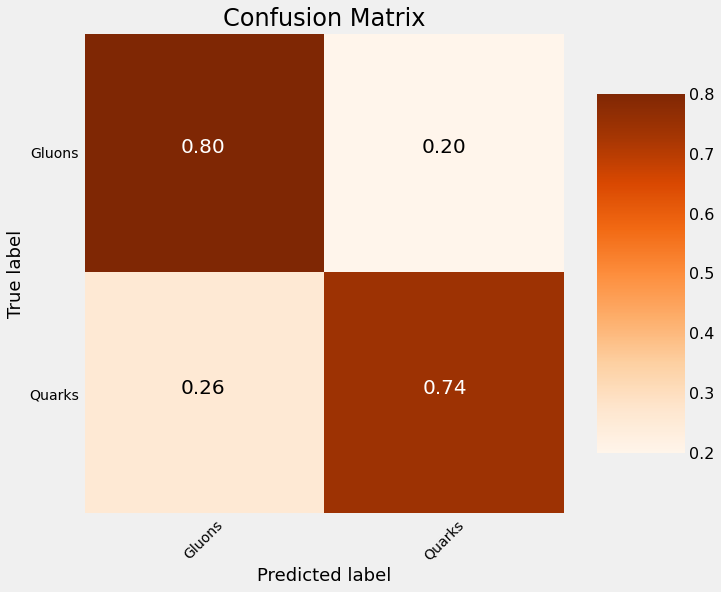

In [ ]:
cm = confusion_matrix(labels_test, y_pred)
# 0 for gluons and 1 for quarks
plot_confusion_matrix(cm, classes = ['Gluons', 'Quarks'],
                      title = 'Confusion Matrix')

In [ ]:
accuracy_score(labels_test, y_pred)

0.7725151515151515